<a href="https://colab.research.google.com/github/Mc4minta/AIB5-PcapAttackClassifier/blob/main/ModelTraining/RandomForest400IntPortCIC1718_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import Trainset

In [50]:
import os
directory_path = '/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/Dataset'

# Check if the directory exists before listing its contents
if os.path.exists(directory_path):
  # List the contents of the directory
  contents = os.listdir(directory_path)

  # Print the contents
  for item in contents:
    print(item)
else:
  print(f"Directory not found: {directory_path}")

TrainRfWeb.csv
TrainCSECICIDS2018.csv
TrainCICIDS2017.csv
TrainCIC1718.csv
TrainCIC1718-2.csv


In [51]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/Dataset/TrainCIC1718-2.csv')
df.head()

,Dst_Port,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,40474,7182757,1,5,6.0,30.0,6.0,6.0,6.0,0.000000,...,20,45201.000,0.000,45201.0,45201.0,7137556.0,0.00,7137556.0,7137556.0,Benign
1,28907,938509,1,5,6.0,30.0,6.0,6.0,6.0,0.000000,...,20,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,Benign
2,0,119995732,123,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,3753432.167,5183854.063,13200000.0,1.0,13100000.0,6507819.26,26300000.0,6484077.0,Benign
3,443,142954,10,6,553.0,3949.0,196.0,0.0,55.3,71.704719,...,20,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,Benign
4,17541,2548725,1,6,6.0,36.0,6.0,6.0,6.0,0.000000,...,20,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,Benign


In [52]:
print(df.info())
print(df['Label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859753 entries, 0 to 1859752
Data columns (total 78 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst_Port           int64  
 1   Flow_Duration      int64  
 2   Tot_Fwd_Pkts       int64  
 3   Tot_Bwd_Pkts       int64  
 4   TotLen_Fwd_Pkts    float64
 5   TotLen_Bwd_Pkts    float64
 6   Fwd_Pkt_Len_Max    float64
 7   Fwd_Pkt_Len_Min    float64
 8   Fwd_Pkt_Len_Mean   float64
 9   Fwd_Pkt_Len_Std    float64
 10  Bwd_Pkt_Len_Max    float64
 11  Bwd_Pkt_Len_Min    float64
 12  Bwd_Pkt_Len_Mean   float64
 13  Bwd_Pkt_Len_Std    float64
 14  Flow_Byts/s        float64
 15  Flow_Pkts/s        float64
 16  Flow_IAT_Mean      float64
 17  Flow_IAT_Std       float64
 18  Flow_IAT_Max       float64
 19  Flow_IAT_Min       float64
 20  Fwd_IAT_Tot        float64
 21  Fwd_IAT_Mean       float64
 22  Fwd_IAT_Std        float64
 23  Fwd_IAT_Max        float64
 24  Fwd_IAT_Min        float64
 25  Bwd_IAT_Tot       

# Encode Destination Port to Catagories

In [53]:
# map destination port to 1-6 numbers
def map_port(port):
    if port == 21:
        return 1  # FTP
    elif port == 22:
        return 2  # SSH
    elif port == 53:
        return 3  # DNS
    elif port == 80:
        return 4  # HTTP
    elif port == 443:
        return 5  # HTTPS
    else:
        return 6  # Other

df['Dst_Port'] = df['Dst_Port'].apply(map_port)

# Reorder columns by moving the label column to the last position
cols = list(df.columns)
cols.append(cols.pop(cols.index('Label')))
df = df[cols]

print(df['Dst_Port'].value_counts())

Dst_Port
6    539859
4    451100
3    313146
1    202360
2    195679
5    157609
Name: count, dtype: int64


# Modeling

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.info())
print(y_train.value_counts())

(1487802, 77)
(371951, 77)
(1487802,)
(371951,)
<class 'pandas.core.frame.DataFrame'>
Index: 1487802 entries, 1724754 to 121958
Data columns (total 77 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst_Port           1487802 non-null  int64  
 1   Flow_Duration      1487802 non-null  int64  
 2   Tot_Fwd_Pkts       1487802 non-null  int64  
 3   Tot_Bwd_Pkts       1487802 non-null  int64  
 4   TotLen_Fwd_Pkts    1487802 non-null  float64
 5   TotLen_Bwd_Pkts    1487802 non-null  float64
 6   Fwd_Pkt_Len_Max    1487802 non-null  float64
 7   Fwd_Pkt_Len_Min    1487802 non-null  float64
 8   Fwd_Pkt_Len_Mean   1487802 non-null  float64
 9   Fwd_Pkt_Len_Std    1487802 non-null  float64
 10  Bwd_Pkt_Len_Max    1487802 non-null  float64
 11  Bwd_Pkt_Len_Min    1487802 non-null  float64
 12  Bwd_Pkt_Len_Mean   1487802 non-null  float64
 13  Bwd_Pkt_Len_Std    1487802 non-null  float64
 14  Flow_Byts/s        1487802 non-nul

In [57]:
label_counts = y_train.value_counts()
benign_count = label_counts['Benign']
other_labels_count = label_counts[label_counts.index != 'Benign'].sum()

total_count = label_counts.sum()

benign_percentage = (benign_count / total_count) * 100
attack_percentage = (other_labels_count / total_count) * 100

percentage_difference = abs(benign_percentage - attack_percentage)

print(f"Benign: {benign_count} ({benign_percentage:.2f}%)")
print(f"Attack: {other_labels_count} ({attack_percentage:.2f}%)")
print(f"Percentage Difference: {percentage_difference:.2f}%\n")

label_percentages = y_train.value_counts(normalize=True) * 100
print("Percentage of each label in the training set:")
print(label_percentages)

Benign: 790828 (53.15%)
Attack: 696974 (46.85%)
Percentage Difference: 6.31%

Percentage of each label in the training set:
Label
Benign            53.154116
FTP-Bruteforce    10.813468
SSH-Bruteforce    10.408374
DoS-Slow-Rate      8.722868
PortScan           8.532856
DoS-HTTP-Flood     8.368318
Name: proportion, dtype: float64


In [58]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [59]:
import joblib

path = '/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/RandomForest400IntPortCIC1718-2.pkl'

joblib.dump(model, path)

print(f"Model saved successfully to {path}")

Model saved successfully to /content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/RandomForest400IntPortCIC1718-2.pkl


In [60]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[197524     31      8      0      0      0]
 [    17  31084      1      0      2      0]
 [     5      3  32388      0      0      0]
 [     2      0      0  40404      0      0]
 [     3      2      0      0  31847      0]
 [     1      0      0      7      0  38622]]

Classification Report:
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00    197563
DoS-HTTP-Flood       1.00      1.00      1.00     31104
 DoS-Slow-Rate       1.00      1.00      1.00     32396
FTP-Bruteforce       1.00      1.00      1.00     40406
      PortScan       1.00      1.00      1.00     31852
SSH-Bruteforce       1.00      1.00      1.00     38630

      accuracy                           1.00    371951
     macro avg       1.00      1.00      1.00    371951
  weighted avg       1.00      1.00      1.00    371951



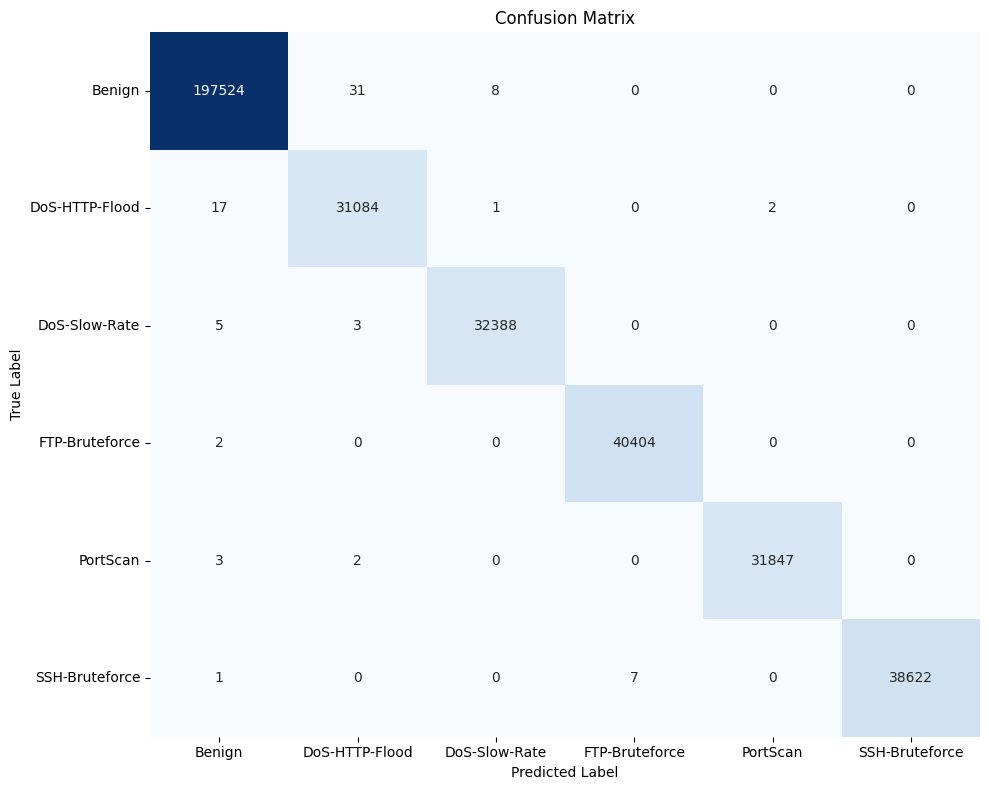

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [62]:
import pandas as pd

y_pred_proba = model.predict_proba(X_test)

y_pred = model.predict(X_test)

pred_proba_df = pd.DataFrame(y_pred_proba, columns=model.classes_)

pred_proba_df['Predicted_Label'] = y_pred
pred_proba_df['True_Label'] = y_test.values

display(pred_proba_df.head())

,Benign,DoS-HTTP-Flood,DoS-Slow-Rate,FTP-Bruteforce,PortScan,SSH-Bruteforce,Predicted_Label,True_Label
0,1.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
1,0.0,0.0,0.0,0.0,0.0,1.0,SSH-Bruteforce,SSH-Bruteforce
2,1.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,1.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
4,1.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [63]:
print(model)
print(model.classes_)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)
['Benign' 'DoS-HTTP-Flood' 'DoS-Slow-Rate' 'FTP-Bruteforce' 'PortScan'
 'SSH-Bruteforce']


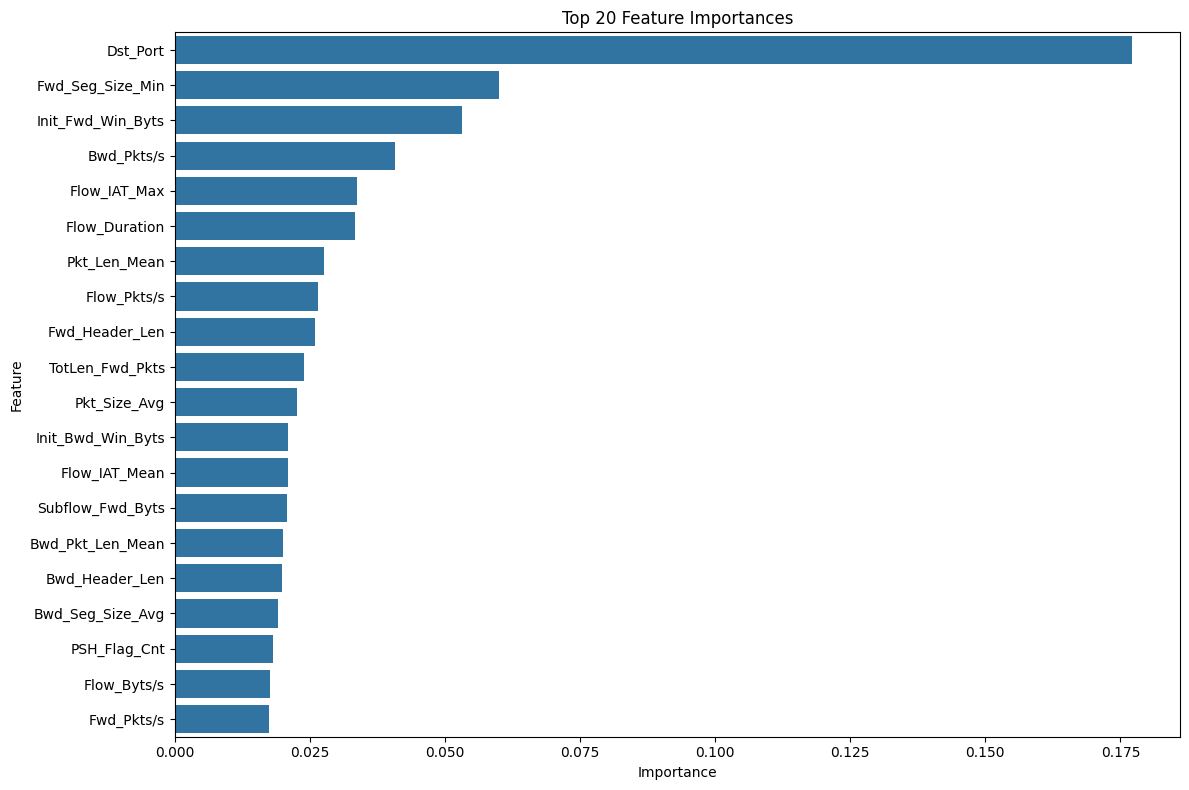

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

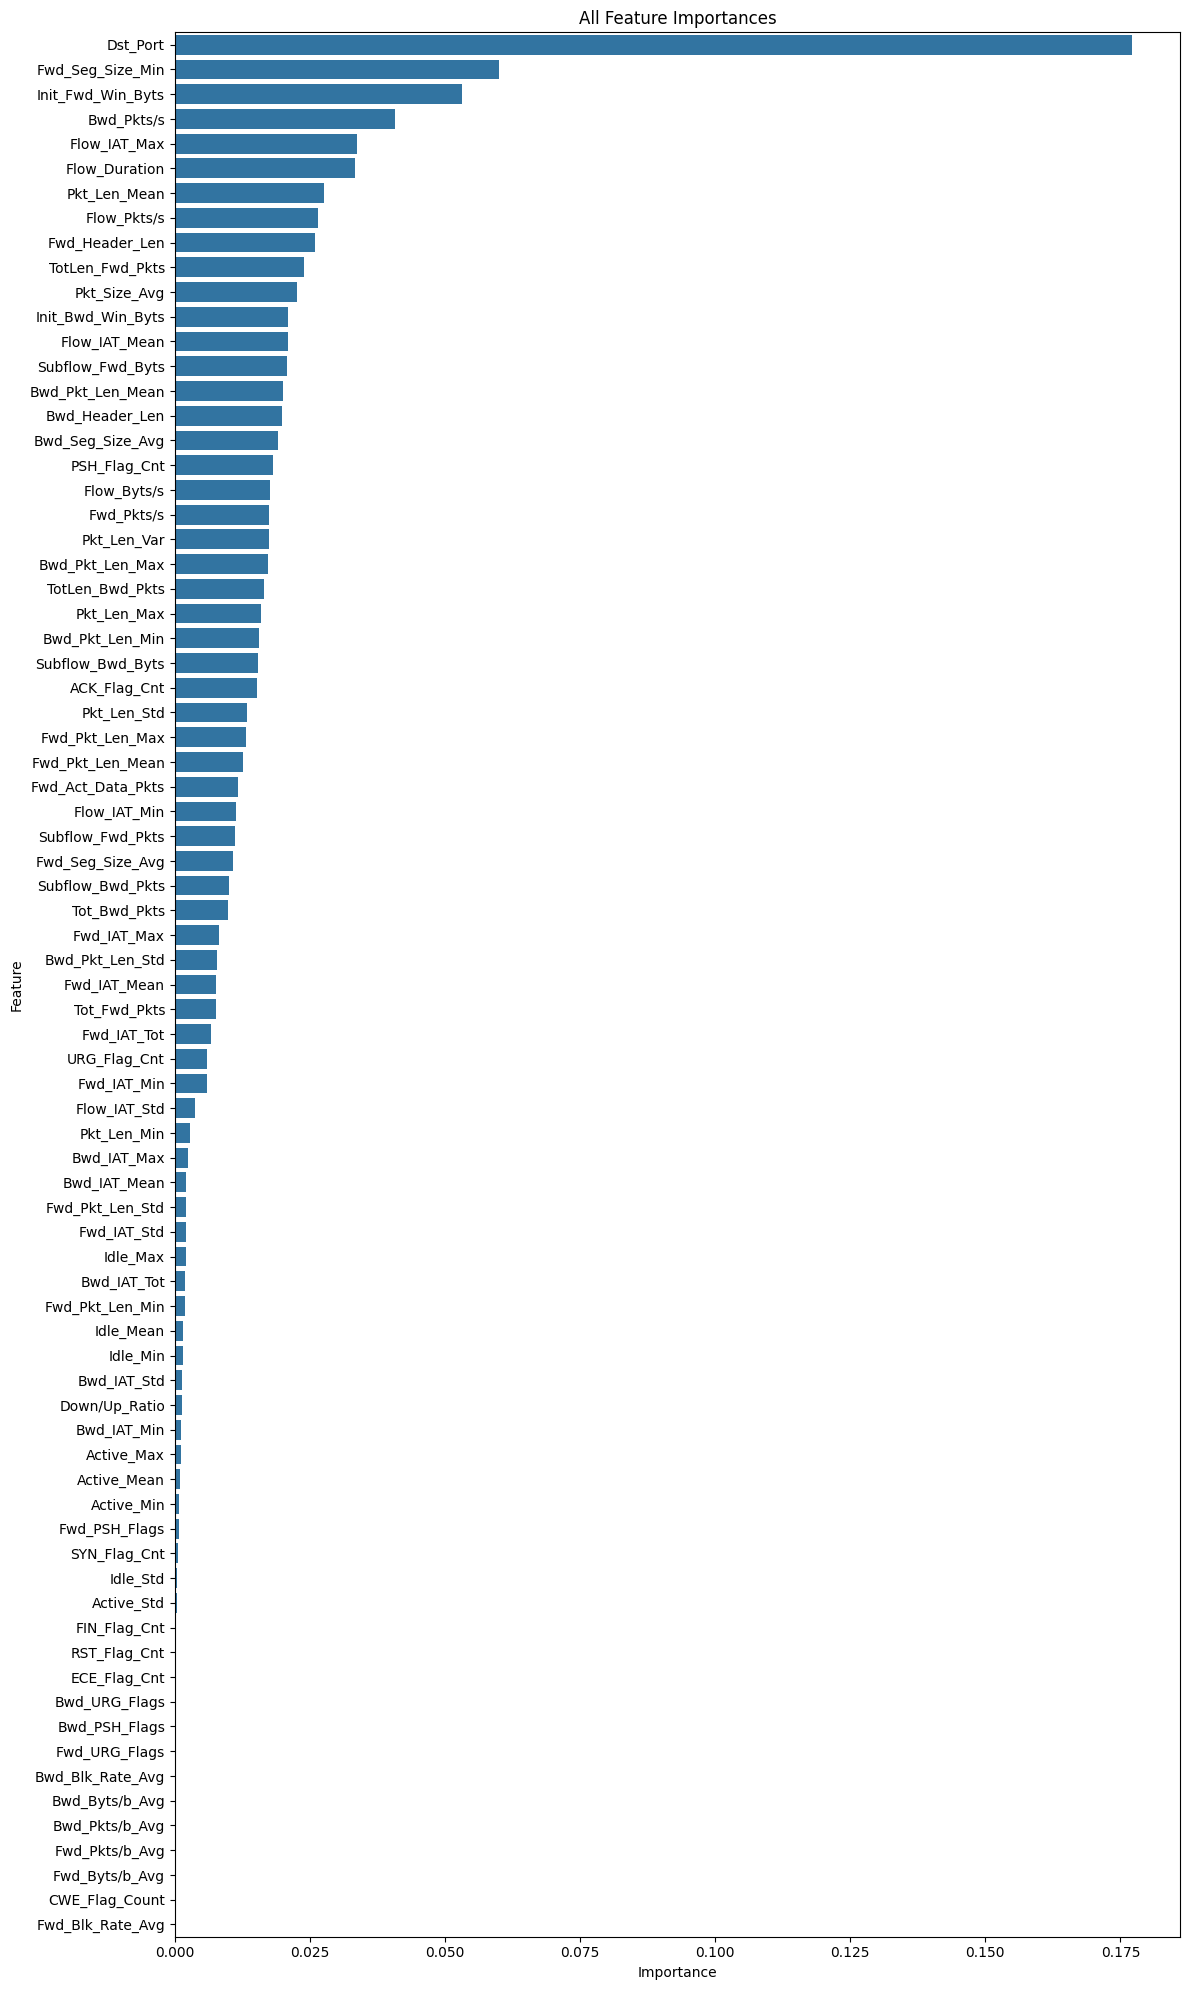

In [65]:
plt.figure(figsize=(12, 20))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('All Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [66]:
i = 1
for feature in feature_importance_df['feature']:
    print(f"{i} {feature}")
    i+=1

1 Dst_Port
2 Fwd_Seg_Size_Min
3 Init_Fwd_Win_Byts
4 Bwd_Pkts/s
5 Flow_IAT_Max
6 Flow_Duration
7 Pkt_Len_Mean
8 Flow_Pkts/s
9 Fwd_Header_Len
10 TotLen_Fwd_Pkts
11 Pkt_Size_Avg
12 Init_Bwd_Win_Byts
13 Flow_IAT_Mean
14 Subflow_Fwd_Byts
15 Bwd_Pkt_Len_Mean
16 Bwd_Header_Len
17 Bwd_Seg_Size_Avg
18 PSH_Flag_Cnt
19 Flow_Byts/s
20 Fwd_Pkts/s
21 Pkt_Len_Var
22 Bwd_Pkt_Len_Max
23 TotLen_Bwd_Pkts
24 Pkt_Len_Max
25 Bwd_Pkt_Len_Min
26 Subflow_Bwd_Byts
27 ACK_Flag_Cnt
28 Pkt_Len_Std
29 Fwd_Pkt_Len_Max
30 Fwd_Pkt_Len_Mean
31 Fwd_Act_Data_Pkts
32 Flow_IAT_Min
33 Subflow_Fwd_Pkts
34 Fwd_Seg_Size_Avg
35 Subflow_Bwd_Pkts
36 Tot_Bwd_Pkts
37 Fwd_IAT_Max
38 Bwd_Pkt_Len_Std
39 Fwd_IAT_Mean
40 Tot_Fwd_Pkts
41 Fwd_IAT_Tot
42 URG_Flag_Cnt
43 Fwd_IAT_Min
44 Flow_IAT_Std
45 Pkt_Len_Min
46 Bwd_IAT_Max
47 Bwd_IAT_Mean
48 Fwd_Pkt_Len_Std
49 Fwd_IAT_Std
50 Idle_Max
51 Bwd_IAT_Tot
52 Fwd_Pkt_Len_Min
53 Idle_Mean
54 Idle_Min
55 Bwd_IAT_Std
56 Down/Up_Ratio
57 Bwd_IAT_Min
58 Active_Max
59 Active_Mean
60 Active_Min
61 Fw